# 調整色調白平衡



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output

In [2]:
def show_img(img):
#     plt.figure(figsize=(15,15)) 
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [9]:
def modify_lightness_saturation(img):
    
    height = img.shape[0]
    width = img.shape[1]
    dst = np.zeros(img.shape, img.dtype)

    # 1.计算三通道灰度平均值
    imgB = img[:, :, 0]
    imgG = img[:, :, 1]
    imgR = img[:, :, 2]

    # 下述3行代码控制白平衡或者冷暖色调，下例中增加了b的分量，会生成冷色调的图像，
    # 如要实现白平衡，则把两个+10都去掉；如要生成暖色调，则增加r的分量即可。
    bAve = cv2.mean(imgB)[0] + 100
    gAve = cv2.mean(imgG)[0] + 100
    rAve = cv2.mean(imgR)[0] 
    aveGray = (int)(bAve + gAve + rAve) / 3

    # 2计算每个通道的增益系数
    bCoef = aveGray / bAve
    gCoef = aveGray / gAve
    rCoef = aveGray / rAve

    # 3使用增益系数
    imgB = np.floor((imgB * bCoef))  # 向下取整
    imgG = np.floor((imgG * gCoef))
    imgR = np.floor((imgR * rCoef))

    # 4将数组元素后处理
    for i in range(0, height):
        for j in range(0, width):
            imgb = imgB[i, j]
            imgg = imgG[i, j]
            imgr = imgR[i, j]
            if imgb > 255:
                imgb = 255
            if imgg > 255:
                imgg = 255
            if imgr > 255:
                imgr = 255
            dst[i, j] = (imgb, imgg, imgr)
            
    print("Cold color:")
    show_img(dst)


In [10]:
def img_processing(img):
    # do something here
    modify_lightness_saturation(img)


origin picture:


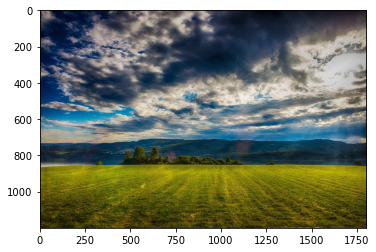

Cold color:


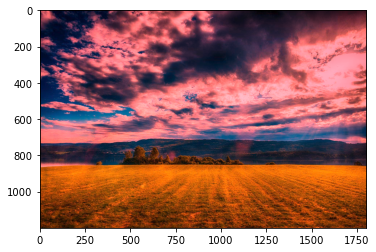

In [11]:
file_name = "./testdata/scenery.jpg"
origin_img = cv2.imread(file_name)
print("origin picture:")
show_img(origin_img)

result_img = img_processing(origin_img)
# show_img(result_img)

# Reference

https://blog.csdn.net/weixin_39853245/article/details/101199768

https://blog.csdn.net/qq_36187544/article/details/97657927?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param

https://blog.csdn.net/wzwxiaozheng/article/details/38434391?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.channel_param&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.channel_param